Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
transaction_data=pd.read_csv(r"C:\Users\Минипроект\transaction_data.csv")

In [50]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [52]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [18]:
transaction_data_up=pd.read_csv(r"C:\Users\Леруся\Desktop\[freekurses.com] 5\[freekurses.com] Задания\Минипроект\transaction_data_updated.csv")

Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [40]:
tr_data_distribution=transaction_data.groupby('transaction',as_index=False)\
        .agg({'name':'count'})\
        .rename(columns={'name':"count_trans"})

<AxesSubplot:xlabel='transaction', ylabel='count_trans'>

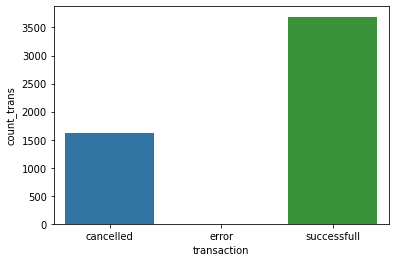

In [41]:
sns.barplot(x='transaction', y='count_trans',data=tr_data_distribution)

Сколько транзакций завершились ошибкой?

In [42]:
transaction_data.query("transaction=='cancelled'").name.count()

1619

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [13]:
success_tr=transaction_data.query('transaction=="successfull"') \
                    .groupby('name') \
                .agg({'transaction':'count'})

In [16]:
success_tr.head()

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68


c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

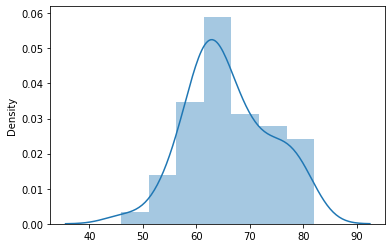

In [15]:
sns.distplot(success_tr)

Коллега прислал Вам обновленные данные. (transaction_data_updated.csv) Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [19]:
transaction_data_up.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [27]:
operation_in_minutes=transaction_data_up.groupby(['name','minute'], as_index=False)\
                                        .agg({'transaction':'count'})
operation_in_minutes

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [48]:
user_vs_minute_pivot=operation_in_minutes.pivot(index='minute', columns='name',values='transaction' ).reset_index()
user_vs_minute_pivot.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [88]:
user_vs_minute_pivot.fillna(0,inplace=True)
user_vs_minute_pivot.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [ ]:
#используем метод pivot_table

In [68]:
operation_in_minutes

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [81]:
user_vs_minute_pivot2=transaction_data_up.pivot_table(index='minute', 
                                                       columns='name',
                                                       values='transaction',
                                                       aggfunc='count', #агрегирующая функция
                                                      fill_value=0).reset_index() #чем заменить nan

In [82]:
user_vs_minute_pivot2.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3,4,2,3,4,4,2,1,2,...,0,3,1,1,4,1,3,0,0,1
1,1,4,4,0,4,2,5,4,4,4,...,4,5,3,2,3,3,0,0,3,2
2,2,1,2,4,4,2,1,3,2,3,...,4,1,3,3,0,1,2,1,3,1
3,3,3,0,2,0,5,2,1,3,2,...,1,5,5,2,4,0,3,4,1,0
4,4,3,0,0,3,1,1,2,3,2,...,1,2,2,1,1,2,2,3,0,1


In [72]:
user_vs_minute_pivot.equals(user_vs_minute_pivot2)#проверка на равенство. не равные так как int and float в ячейках датафреймов 

False

In [86]:
user_vs_minute_pivot2=transaction_data_up.pivot_table(index='minute', 
                                                       columns='name',
                                                       values='transaction',
                                                       aggfunc='count').reset_index() #чем заменить nan
user_vs_minute_pivot2.fillna(0,inplace=True) #заменяем на нули, чтобы получился float для равенства

In [85]:
user_vs_minute_pivot.equals(user_vs_minute_pivot2)

True

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

<AxesSubplot:>

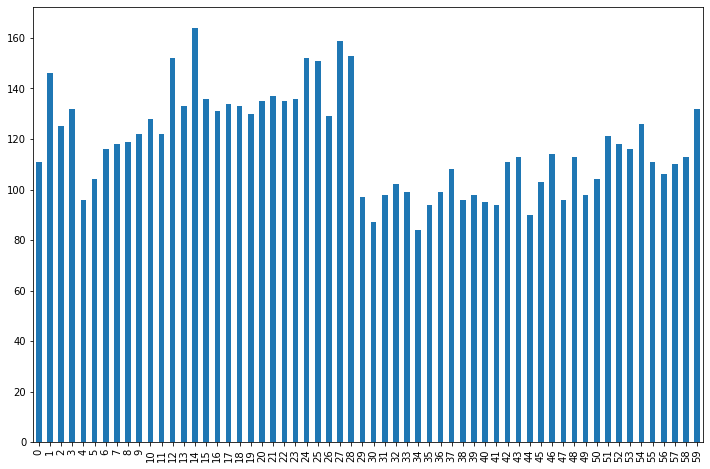

In [92]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12,8))
#чтобы суммирование было не по столбцам, а по строкам

In [93]:
#неправильный график, т.к. в данных некорректно отделены минуты. исправляем

transaction_data_up['date']=pd.to_datetime(transaction_data_up.date)

In [94]:
transaction_data_up['true_minute']=transaction_data_up.date.dt.minute+transaction_data_up.date.dt.hour*60

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

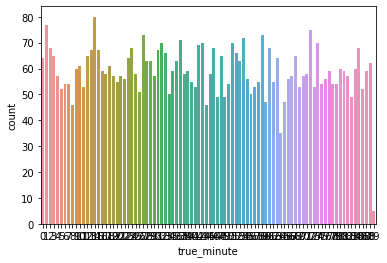

In [95]:
sns.countplot(transaction_data_up['true_minute'])